# Table of Contents
1. [Topic_1](#topic_1)
    * [Load Data](#load_data)
    * [Data Preprocessing](#data_preprocessing)
2. [Experiment 1](#exp_1)
    * [Analysis](#a_1)
    * [Visualization](#v_1)
3. [Exp.2: Ways to Calculate Outliers](#exp_2)
    * [Gaussian](#a_2)
    * [Non Gaussion](#a_2_non)
4. [Unused](#unused)

## Topic 1 <a name="topic_1"></a>
> Some introduction text, formatted in heading 2 style

In [1]:
import sys #only needed to determine Python version number
import pandas as pd #this is how I usually import pandas
import matplotlib.pyplot as plt
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

### Load Data <a name="load_data"></a>

In [2]:
def readData(location):
    try:
        if location.endswith('.txt') or location.endswith('.csv'):
            return pd.read_csv(location)
        elif location.endswith('.xlsx'):
            return pd.read_excel(location)
        else:
            raise TypeError
    except TypeError:
        print("invalid file type")
    except:
        print("other exceptions")

location = './dataset/Seasons_Stats.csv'        
players_all = readData(location) #since 1995
players_all = players_all.drop(columns=['Unnamed: 0', 'blanl', 'blank2'])
print(players_all.columns)
print(players_all.index)
players_all = players_all.loc[:, ['Year', 'Player', 'Tm', 'Pos', 'PTS', 'G', 'GS', 'FG%', '3P%', '2P%', 'FT%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'PF']]
print(players_all.columns)
players_2017 = players_all.loc[(players_all["Year"] == 2017), :]
players_2017.tail()

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS'],
      dtype='object')
RangeIndex(start=0, stop=24691, step=1)
Index(['Year', 'Player', 'Tm', 'Pos', 'PTS', 'G', 'GS', 'FG%', '3P%', '2P%',
       'FT%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'PF'],
      dtype='object')


,Year,Player,Tm,Pos,PTS,G,GS,FG%,3P%,2P%,FT%,TRB%,AST%,STL%,BLK%,TOV%,PF
24686,2017.0,Cody Zeller,CHO,PF,639.0,62.0,58.0,0.571,0.000,0.572,0.679,12.9,9.1,1.8,3.0,10.9,189.0
24687,2017.0,Tyler Zeller,BOS,C,178.0,51.0,5.0,0.494,0.000,0.497,0.564,13.2,12.2,0.7,3.3,10.2,61.0
24688,2017.0,Stephen Zimmerman,ORL,C,23.0,19.0,0.0,0.323,NaN,0.323,0.600,17.6,5.3,0.9,3.7,8.3,17.0
24689,2017.0,Paul Zipser,CHI,SF,240.0,44.0,18.0,0.398,0.333,0.451,0.775,8.0,6.1,0.9,1.5,14.4,78.0
24690,2017.0,Ivica Zubac,LAL,C,284.0,38.0,11.0,0.529,0.000,0.536,0.653,14.3,8.1,1.1,4.4,10.4,66.0


### Data Preprocessing <a name="data_preprocessing"></a>

In [3]:
'''players_2017.info()
players_2017["PTS"].describe() #descrpitive staitistics'''
'''type(players_2017)
players_2017.dtypes
players_2017["Player"].dtype'''

players_all.head(1)["3P%"]
print(players_all["3P%"].max())
sort_by_3pt = players_all.sort_values(['3P%'], ascending=False)
sort_by_3pt.head(1)

#del players_2017["Year"]
player_positions = players_2017["Pos"].unique()
print(player_positions)
players_2017.groupby(["Pos"]).size()
players_2017.loc[:, "Pos"] = players_2017["Pos"].replace(to_replace="PF-C", value="PF")

player_names = players_2017["Player"].unique()
print("Player names in total: "+str(len(players_2017))+", unique: "+str(len(player_names)))
players_2017.groupby(["Player"]).size()
is_duplicated = players_2017.duplicated(subset='Player', keep='first')
players_2017 = players_2017.loc[~is_duplicated, :]
player_names = players_2017["Player"].unique()
print("Player names in total: "+str(len(players_2017))+", unique: "+str(len(player_names)))




1.0
['SG' 'PF' 'C' 'SF' 'PG' 'PF-C']
Player names in total: 595, unique: 486
Player names in total: 486, unique: 486


/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Experiment 1  <a name="exp_1"></a>
> The first paragraph text

###  Analysis <a name="a_1"></a>
> This is a sub paragraph, formatted in heading 3 style

In [6]:
gb_team_pos = players_2017.groupby(["Tm", "Pos"])
team_components = gb_team_pos.size()

### Visualization <a name="v_1"></a>
> The second paragraph text

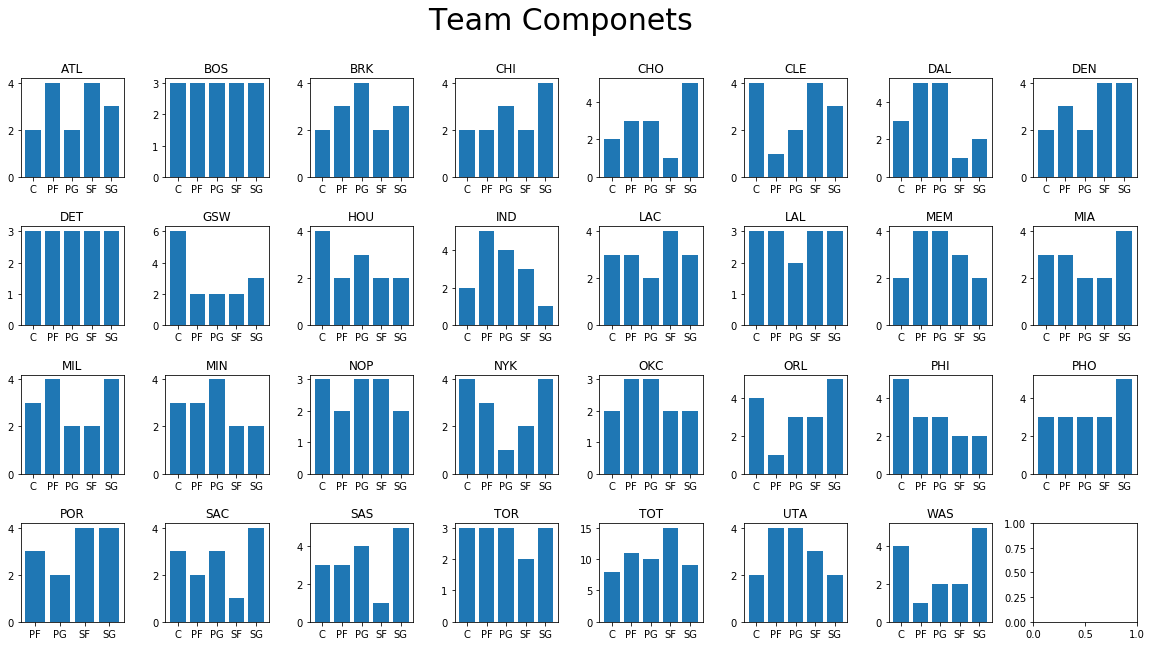

In [73]:
#figure, subplots, http://www.scipy-lectures.org/intro/index.html

fig, ax = plt.subplots(nrows=4, ncols=8, figsize=(20,10))
index = 0
for team in team_components.index.levels[0]:
    #print(team_components[team].values)
    x = team_components[team].index
    y = team_components[team].values
    ax_row, ax_col = int(index/8), int(index%8)
    ax[ax_row][ax_col].bar(x, y)
    ax[ax_row][ax_col].set_title(team)
    index+=1
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.suptitle("Team Componets", size=30)
plt.show()

## Exp. 2: Ways to Calculate Outliers <a name="exp_2"></a>

### Gaussian <a name="a_2"><a>
> Average and Standard Deviation are only valid for gaussian distributions

In [76]:
pts = players_2017["PTS"]
outlier = pts.transform(lambda x: abs(x-x.mean()) > 1.96*x.std())
#fig_2, ax_2 = plt.subplots(figsize=(20,10))
'''
newdf = df.copy()

StateMonth = newdf.groupby(['State', lambda x: x.month])

def s(group):
    group['x-Mean'] = abs(group['Revenue'] - group['Revenue'].mean())
    group['1.96*std'] = 1.96*group['Revenue'].std()  
    group['Outlier'] = abs(group['Revenue'] - group['Revenue'].mean()) > 1.96*group['Revenue'].std()
    return group

Newdf2 = StateMonth.apply(s)
'''
outlier

24096    False
24097    False
24100    False
24101    False
24102    False
24103    False
24104    False
24105    False
24106    False
24107    False
24108    False
24109    False
24110    False
24113    False
24114    False
24115     True
24116     True
24117    False
24118    False
24119    False
24120    False
24121    False
24122    False
24123    False
24124    False
24125    False
24126    False
24127     True
24128    False
24131    False
         ...  
24653    False
24654     True
24655    False
24656    False
24657    False
24658     True
24659    False
24660    False
24661    False
24664    False
24667    False
24670    False
24671    False
24672    False
24675    False
24676    False
24677    False
24678    False
24679    False
24680    False
24681    False
24682    False
24683    False
24684    False
24685    False
24686    False
24687    False
24688    False
24689    False
24690    False
Name: PTS, Length: 486, dtype: bool

In [ ]:
outlier = pts.transform(lambda x: abs(x-x.mean()) > 1.96*x.std())
'''
newdf = df.copy()

State = newdf.groupby('State')

newdf['Lower'] = State['Revenue'].transform( lambda x: x.quantile(q=.25) - (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf['Upper'] = State['Revenue'].transform( lambda x: x.quantile(q=.75) + (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf['Outlier'] = (newdf['Revenue'] < newdf['Lower']) | (newdf['Revenue'] > newdf['Upper'])
'''

## Unused <a name="unused"></a>

In [ ]:
'''
df.stack()
df.unstack()
df.T
df.loc[df.index[5:],'col']
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])
df.sort_index()
pd.concat()
df.apply()
series.transform()
idx = pd.date_range('1/1/2012', periods=10, freq='MS')
'''